## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## BUSINESS UNDESTANDING
 ---
 

In [30]:
# Your code here - remember to use markdown cells for comments as well!

# To identify features that influence pricing

In [3]:
#importing necessary libraries for the project
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error

In [4]:
data=pd.read_csv("data/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [33]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [35]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data.sqft_basement.isna().sum()

0

In [ ]:
data.id.duplicated().sum()

# Data cleaning

In [37]:
data.dropna(inplace=True)

In [38]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [39]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [40]:
duplicates = data[data.duplicated(['id'], keep=False)]
duplicates


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,8648900110,8/26/2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,...,8 Good,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20164,7853400250,6/4/2014,610000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


The ids are duplicated because the same house was sold multiple times. Therefore, we shall be keeping the records.

# finding unique columns in the categorical dataset

In [41]:
# finding unique columns in the view column
v_count=data["view"].value_counts()
v_count

NONE         14241
AVERAGE        688
GOOD           348
FAIR           245
EXCELLENT      240
Name: view, dtype: int64

In [42]:
#unique columns in the condition
c_counts = data['condition'].value_counts()
print(c_counts)

Average      10221
Good          4137
Very Good     1254
Fair           131
Poor            19
Name: condition, dtype: int64


In [43]:
#unique columns in the water column
w_counts = data['waterfront'].value_counts()
print(w_counts)

NO     15642
YES      120
Name: waterfront, dtype: int64


In [44]:
#unique columns in the grade
g_counts = data['grade'].value_counts()
print(g_counts)

7 Average        6539
8 Good           4438
9 Better         1920
6 Low Average    1482
10 Very Good      832
11 Excellent      290
5 Fair            167
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: grade, dtype: int64


# building model in categorical varriable affects the price of the house

In [45]:
data.select_dtypes("object")# selecting columns with objects dataset

,date,waterfront,view,condition,grade,sqft_basement
1,12/9/2014,NO,NONE,Average,7 Average,400.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0
5,5/12/2014,NO,NONE,Average,11 Excellent,1530.0
6,6/27/2014,NO,NONE,Average,7 Average,?
...,...,...,...,...,...,...
21591,2/19/2015,NO,NONE,Average,8 Good,130.0
21592,5/21/2014,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,NO,NONE,Average,7 Average,0.0


In [46]:
y = data["price"]
X = data[["condition", "grade", "view"]]
X = pd.get_dummies(X, columns=['view'], drop_first=True)#NO as the reference category
X

,condition,grade,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
1,Average,7 Average,0,0,0,1
3,Very Good,7 Average,0,0,0,1
4,Average,8 Good,0,0,0,1
5,Average,11 Excellent,0,0,0,1
6,Average,7 Average,0,0,0,1
...,...,...,...,...,...,...
21591,Average,8 Good,0,0,0,1
21592,Average,8 Good,0,0,0,1
21593,Average,8 Good,0,0,0,1
21594,Average,7 Average,0,0,0,1


In [47]:
X = X.apply(pd.to_numeric, errors='coerce')
model=sm.OLS(y,sm.add_constant(X)).fit()
print(model.summary())

MissingDataError: exog contains inf or nans

# describing  numeric columns

In [ ]:
data.describe()["bedrooms"]

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


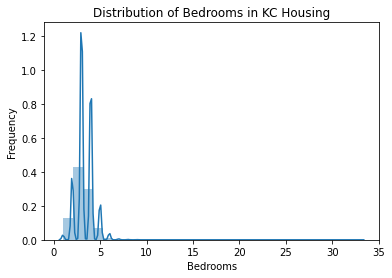

In [ ]:
#Describing the bathroom column
sns.distplot(data['bedrooms'], bins=30, kde=True)
plt.title('Distribution of Bedrooms in KC Housing')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#descriptipon of price as the predictor
data.describe()["price"]

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

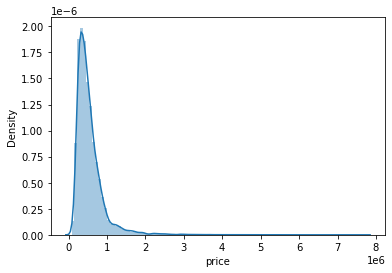

In [ ]:
sns.distplot(data['price'], bins=100, kde=True)

In [ ]:
#describing bathrooms
data.describe()["bathrooms"]

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

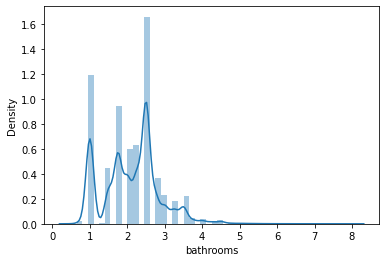

In [ ]:
sns.distplot(data['bathrooms'], bins=50, kde=True)

In [ ]:
#describing the sqft_above column
data.describe()["sqft_above"]

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

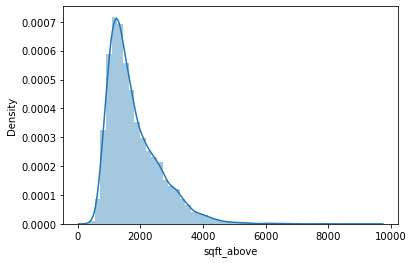

In [ ]:
sns.distplot(data['sqft_above'], bins=50, kde=True)

In [ ]:
data.describe()["sqft_living"]

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

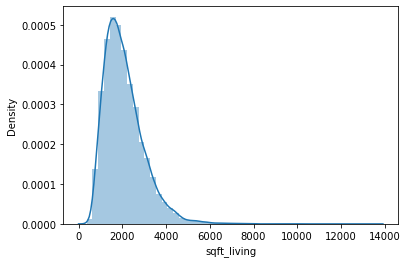

In [ ]:
sns.distplot(data['sqft_living'], bins=50, kde=True)

# Data cleaning in numerical column

In [ ]:
numeric=data.select_dtypes("number").sum()
numeric

id               7.087812e+13
price            8.354769e+09
bedrooms         5.213100e+04
bathrooms        3.273275e+04
sqft_living      3.217744e+07
sqft_lot         2.358502e+08
floors           2.305950e+04
sqft_above       2.767508e+07
sqft_basement    4.502357e+06
yr_built         3.041257e+07
yr_renovated     1.261576e+06
zipcode          1.513237e+09
lat              7.337918e+05
long            -1.885632e+06
sqft_living15    3.071801e+07
sqft_lot15       1.984521e+08
dtype: float64

In [ ]:
# Drop the records with a '?' in the 'sqft_basement' column
data = data[data['sqft_basement'] != '?']

# Convert the 'sqft_basement' column to float
data['sqft_basement'] = data['sqft_basement'].astype(float)

# Preview the first five rows of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


In [ ]:
numeric.isna().sum()#finding the sum of null values in the numerical column

0

In [ ]:

corr=data.corr()
p_corr = corr > 0.5
p_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,True,True,False,False,False,True,False,False,False,False,False,True,False
bedrooms,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,True,True,False,True,False,True,True,False,False,False,False,True,False
sqft_living,False,True,True,True,True,False,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,True,True,False,True,False,True,False,False,False,False,False,True,False
yr_built,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,NaN,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,NaN,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,NaN,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,NaN,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,NaN,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,NaN,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,NaN,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,NaN,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,NaN,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777


<AxesSubplot:>

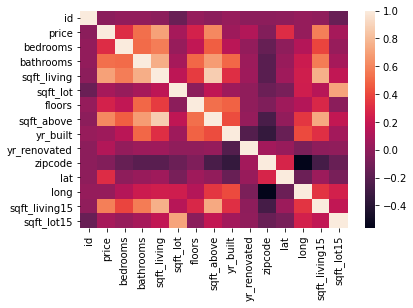

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data_correlation = data.corr().style.background_gradient(cmap='Accent').set_precision(2)
data_correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.01,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.61,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.51,0.58,0.03,0.18,0.48,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.51,1.00,0.76,0.09,0.50,0.69,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.76,1.00,0.17,0.35,0.88,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.00,0.18,0.05,0.00,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1.00,0.52,0.49,0.00,-0.06,0.05,0.13,0.28,-0.01
sqft_above,-0.01,0.61,0.48,0.69,0.88,0.18,0.52,1.00,0.42,0.02,-0.26,-0.00,0.34,0.73,0.20
yr_built,0.02,0.05,0.16,0.51,0.32,0.05,0.49,0.42,1.00,-0.23,-0.35,-0.15,0.41,0.33,0.07
yr_renovated,-0.01,0.13,0.02,0.05,0.06,0.00,0.00,0.02,-0.23,1.00,0.07,0.03,-0.07,-0.00,0.00


In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.groupby(["price","yr_built","yr_renovated","bedrooms","waterfront","view"]).sum()

,,,,,,id,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
price,yr_built,yr_renovated,bedrooms,waterfront,view,,,,,,,,,,,,
82000.0,1954,0.0,3,NO,NONE,3883800011,1.00,860,10426,1.0,0.0,860,98146,47.4987,-122.341,1140,11250
82500.0,1951,0.0,2,NO,NONE,1623049041,1.00,520,22334,1.0,0.0,520,98168,47.4799,-122.296,1572,10570
83000.0,1918,0.0,2,NO,NONE,7999600180,1.00,900,8580,1.0,0.0,900,98168,47.4727,-122.270,2060,6533
84000.0,1949,0.0,2,NO,NONE,1523049188,1.00,700,20130,1.0,0.0,700,98168,47.4752,-122.271,1490,18630
85000.0,1939,0.0,2,NO,NONE,2422049104,1.00,830,9000,1.0,0.0,830,98032,47.3813,-122.243,1160,7680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110000.0,1999,0.0,5,YES,EXCELLENT,1247600105,5.25,8010,45517,2.0,0.0,5990,98033,47.6767,-122.211,3430,26788
5350000.0,2009,0.0,5,NO,EXCELLENT,8907500070,5.00,8000,23985,2.0,0.0,6720,98004,47.6232,-122.220,4600,21750
6890000.0,2001,0.0,6,NO,EXCELLENT,9208900037,7.75,9890,31374,2.0,0.0,8860,98039,47.6305,-122.240,4540,42730


In [73]:
grouped_data = data.groupby(['lat', 'long', 'price'])['view', 'waterfront'].mean()
grouped_data

<ipython-input-73-cbb98a66f8da>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = data.groupby(['lat', 'long', 'price'])['view', 'waterfront'].mean()


DataError: No numeric types to aggregate

 # Build Baseline Simple Linear Regression Model

# lets make sqft_living as our baseline as it has the highest correlation

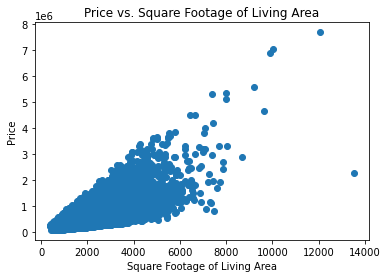

In [ ]:
# Plot of price against the highly correlated Predictors
plt.scatter(data["sqft_living"], data["price"])

# Add labels and title
plt.title("Price vs. Square Footage of Living Area")
plt.xlabel("Square Footage of Living Area")
plt.ylabel("Price")

# Show the plot
plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

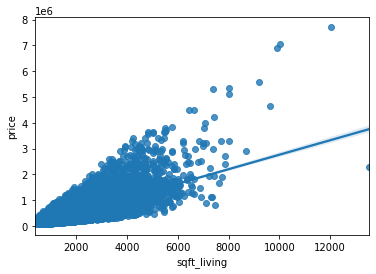

In [ ]:
sns.regplot(x="sqft_living", y="price",data=data)


In [ ]:
X=data[["sqft_living"]]
y=data["price"]
model=sm.OLS(endog=y,exog=sm.add_constant(X))
result1=model.fit()
print(result1.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:39:38   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

# The model is statistically significant overall, with an F-statistic p-value well below 0.05
# The model explains about 49% of the variance in price
# The model coefficients constant and sqft_living are all statistically significant, p-values well below 0.05

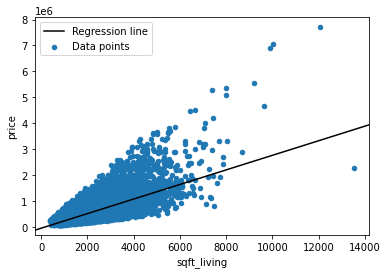

In [ ]:
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=result1, label="Regression line", ax=ax, color="black")
ax.legend();

# building a multiple model

In [ ]:
X_all= data[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15']]
X_all


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
1,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1690,7639
3,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,1360,5000
4,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,1800,7503
5,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,4760,101930
8,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,1294,2.0,NO,NONE,Average,8 Good,1180,130.0,2008,1330,1265
21592,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,1530,1509
21593,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,1830,7200
21594,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,1020,2007


In [ ]:
X2= X_all.copy
X2=sm.OLS(y,sm.add_constant(X2))
results= X2.fit()
print(results.summary())

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'builtin_function_or_method'

In [ ]:
#model for all the correlated variable with price
x_multiple=data[["sqft_living","bathrooms","sqft_above","sqft_living15"]]
model2=sm.OLS(endog=y,exog=sm.add_constant(x_multiple))
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     5423.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:08:00   Log-Likelihood:            -2.9988e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21592   BIC:                         5.998e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.769e+04   6113.052    -15.981

# The model is statistically significant overall, with an F-statistic p-value well below 0.05
 # The model explains about 50% of the variance in salesprice
# The fact that we went from 2 predictors to 7 predictors and only increased R-Squared by 1% is an indicator that this is not a very good model


In [ ]:
baseline_mae = mean_absolute_error(y, result1.predict(sm.add_constant(X)))
baseline_mae

173824.8874961748

#encoding categorical columns

In [ ]:
# 

In [54]:
X_ALL= data[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',  'sqft_basement', 'yr_built']]

# Preview the X_iter dataframe
X_ALL

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built
1,3,2.25,2.0,NO,NONE,Average,7 Average,400.0,1951
3,4,3.00,1.0,NO,NONE,Very Good,7 Average,910.0,1965
4,3,2.00,1.0,NO,NONE,Average,8 Good,0.0,1987
5,4,4.50,1.0,NO,NONE,Average,11 Excellent,1530.0,2001
6,3,2.25,2.0,NO,NONE,Average,7 Average,?,1995
...,...,...,...,...,...,...,...,...,...
21591,3,2.50,2.0,NO,NONE,Average,8 Good,130.0,2008
21592,3,2.50,3.0,NO,NONE,Average,8 Good,0.0,2009
21593,4,2.50,2.0,NO,NONE,Average,8 Good,0.0,2014
21594,2,0.75,2.0,NO,NONE,Average,7 Average,0.0,2009


In [55]:
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}

# Map the ordinal numerical values to the 'condition' and 'grade' columns
X_ALL['condition'] = X_ALL['condition'].map(condition_dict)
X_ALL['grade'] = X_ALL['grade'].map(grade_dict)

# Preview the dataframe
X_ALL

<ipython-input-55-70c7d021ef20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ALL['condition'] = X_ALL['condition'].map(condition_dict)
<ipython-input-55-70c7d021ef20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ALL['grade'] = X_ALL['grade'].map(grade_dict)


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built
1,3,2.25,2.0,NO,NONE,3,7,400.0,1951
3,4,3.00,1.0,NO,NONE,5,7,910.0,1965
4,3,2.00,1.0,NO,NONE,3,8,0.0,1987
5,4,4.50,1.0,NO,NONE,3,11,1530.0,2001
6,3,2.25,2.0,NO,NONE,3,7,?,1995
...,...,...,...,...,...,...,...,...,...
21591,3,2.50,2.0,NO,NONE,3,8,130.0,2008
21592,3,2.50,3.0,NO,NONE,3,8,0.0,2009
21593,4,2.50,2.0,NO,NONE,3,8,0.0,2014
21594,2,0.75,2.0,NO,NONE,3,7,0.0,2009


In [56]:
# Encode the categorical variables
X_ALL = pd.get_dummies(X_ALL, columns=['waterfront', 'view'], drop_first=False)

# Preview the dataframe
X_ALL

,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_built,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
1,3,2.25,2.0,3,7,400.0,1951,1,0,0,0,0,0,1
3,4,3.00,1.0,5,7,910.0,1965,1,0,0,0,0,0,1
4,3,2.00,1.0,3,8,0.0,1987,1,0,0,0,0,0,1
5,4,4.50,1.0,3,11,1530.0,2001,1,0,0,0,0,0,1
6,3,2.25,2.0,3,7,?,1995,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,2.0,3,8,130.0,2008,1,0,0,0,0,0,1
21592,3,2.50,3.0,3,8,0.0,2009,1,0,0,0,0,0,1
21593,4,2.50,2.0,3,8,0.0,2014,1,0,0,0,0,0,1
21594,2,0.75,2.0,3,7,0.0,2009,1,0,0,0,0,0,1


In [57]:
# Drop the 'waterfront_NO' and 'view_NONE' columns
X_ALL. drop(['waterfront_NO', 'view_NONE'], axis=1, inplace=True)

# Preview the dataframe
X_ALL

,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_built,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
1,3,2.25,2.0,3,7,400.0,1951,0,0,0,0,0
3,4,3.00,1.0,5,7,910.0,1965,0,0,0,0,0
4,3,2.00,1.0,3,8,0.0,1987,0,0,0,0,0
5,4,4.50,1.0,3,11,1530.0,2001,0,0,0,0,0
6,3,2.25,2.0,3,7,?,1995,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,2.0,3,8,130.0,2008,0,0,0,0,0
21592,3,2.50,3.0,3,8,0.0,2009,0,0,0,0,0
21593,4,2.50,2.0,3,8,0.0,2014,0,0,0,0,0
21594,2,0.75,2.0,3,7,0.0,2009,0,0,0,0,0


In [60]:
y=[["price"]]
iterated_model = sm.OLS(y, sm.add_constant(X_ALL))
iterated_results = iterated_model.fit()

# Print the summary results of the baseline model
print(iterated_results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,5,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,5,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,6,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,8,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,5,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,6,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,6,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,6,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,5,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [ ]:
X_iter = pd.get_dummies(X_iter, columns=['waterfront', 'view'], drop_first=False)

# Preview the dataframe
X_iter

In [61]:
data.groupby(["lat","long])

SyntaxError: EOL while scanning string literal (<ipython-input-61-999cd45ddd07>, line 1)